In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
#AIM :- predicting the highest value of Bitcoin on any day using other values such as lowest value of bitcoin, opening and closing values of bitcoin as parameters.

In [2]:
data=pd.read_csv('/content/BTC-USD.csv')
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...
2686,2022-01-24,36275.734375,37247.519531,33184.058594,36654.328125,36654.328125,41856658597
2687,2022-01-25,36654.804688,37444.570313,35779.429688,36954.003906,36954.003906,26428189594
2688,2022-01-26,36950.515625,38825.410156,36374.906250,36852.121094,36852.121094,31324598034
2689,2022-01-27,36841.878906,37148.324219,35629.281250,37138.234375,37138.234375,25041426629


In [3]:
data=data.tail(1000) # selecting the data of the most recent 1000 days whose data is available
data

,Date,Open,High,Low,Close,Adj Close,Volume
1691,2019-05-05,5831.068359,5833.862793,5708.035156,5795.708496,5795.708496,14808830723
1692,2019-05-06,5791.693359,5802.957520,5653.687500,5746.807129,5746.807129,15737171804
1693,2019-05-07,5745.599121,5988.178223,5741.395996,5829.501465,5829.501465,18026409033
1694,2019-05-08,5849.481445,5989.980957,5794.715820,5982.457520,5982.457520,15320605300
1695,2019-05-09,5982.316406,6183.039063,5982.316406,6174.528809,6174.528809,16784645411
...,...,...,...,...,...,...,...
2686,2022-01-24,36275.734375,37247.519531,33184.058594,36654.328125,36654.328125,41856658597
2687,2022-01-25,36654.804688,37444.570313,35779.429688,36954.003906,36954.003906,26428189594
2688,2022-01-26,36950.515625,38825.410156,36374.906250,36852.121094,36852.121094,31324598034
2689,2022-01-27,36841.878906,37148.324219,35629.281250,37138.234375,37138.234375,25041426629


In [4]:
data.dropna() #dropping null data 

,Date,Open,High,Low,Close,Adj Close,Volume
1691,2019-05-05,5831.068359,5833.862793,5708.035156,5795.708496,5795.708496,14808830723
1692,2019-05-06,5791.693359,5802.957520,5653.687500,5746.807129,5746.807129,15737171804
1693,2019-05-07,5745.599121,5988.178223,5741.395996,5829.501465,5829.501465,18026409033
1694,2019-05-08,5849.481445,5989.980957,5794.715820,5982.457520,5982.457520,15320605300
1695,2019-05-09,5982.316406,6183.039063,5982.316406,6174.528809,6174.528809,16784645411
...,...,...,...,...,...,...,...
2686,2022-01-24,36275.734375,37247.519531,33184.058594,36654.328125,36654.328125,41856658597
2687,2022-01-25,36654.804688,37444.570313,35779.429688,36954.003906,36954.003906,26428189594
2688,2022-01-26,36950.515625,38825.410156,36374.906250,36852.121094,36852.121094,31324598034
2689,2022-01-27,36841.878906,37148.324219,35629.281250,37138.234375,37138.234375,25041426629


In [5]:
data.corr() #checking columns which have the most relation to the highest value of bitcoin

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999212,0.998433,0.997986,0.997986,0.444618
High,0.999212,1.000000,0.998371,0.999105,0.999105,0.452650
Low,0.998433,0.998371,1.000000,0.998966,0.998966,0.426669
Close,0.997986,0.999105,0.998966,1.000000,1.000000,0.441472
Adj Close,0.997986,0.999105,0.998966,1.000000,1.000000,0.441472
Volume,0.444618,0.452650,0.426669,0.441472,0.441472,1.000000


In [6]:
data=data.iloc[:,0:5] # removing the volume column as it does not have a strong relation to the highest value and removing Adj Close column as it does not differ much from Close
data


,Date,Open,High,Low,Close
1691,2019-05-05,5831.068359,5833.862793,5708.035156,5795.708496
1692,2019-05-06,5791.693359,5802.957520,5653.687500,5746.807129
1693,2019-05-07,5745.599121,5988.178223,5741.395996,5829.501465
1694,2019-05-08,5849.481445,5989.980957,5794.715820,5982.457520
1695,2019-05-09,5982.316406,6183.039063,5982.316406,6174.528809
...,...,...,...,...,...
2686,2022-01-24,36275.734375,37247.519531,33184.058594,36654.328125
2687,2022-01-25,36654.804688,37444.570313,35779.429688,36954.003906
2688,2022-01-26,36950.515625,38825.410156,36374.906250,36852.121094
2689,2022-01-27,36841.878906,37148.324219,35629.281250,37138.234375


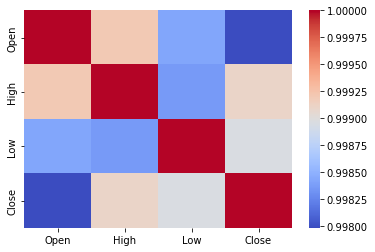

In [7]:
corr=data.corr() #this is a heatmap which shows the correlation of different columns in the form of a graph
sns.heatmap(corr, cmap='coolwarm')

In [8]:
data['Date'].is_unique #checking if there are any cases of multiple data for same day 



True

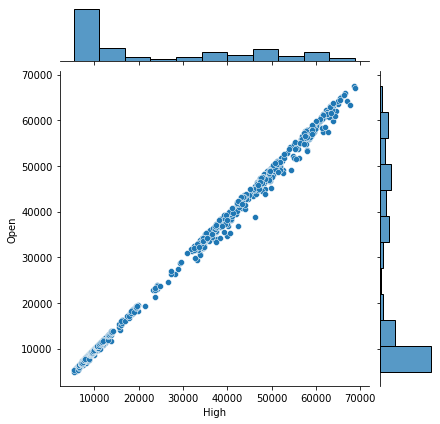

In [9]:
sns.jointplot(x='High', y='Open',data=data ) #comparing the values of other columns vs Highest value of bitcoin

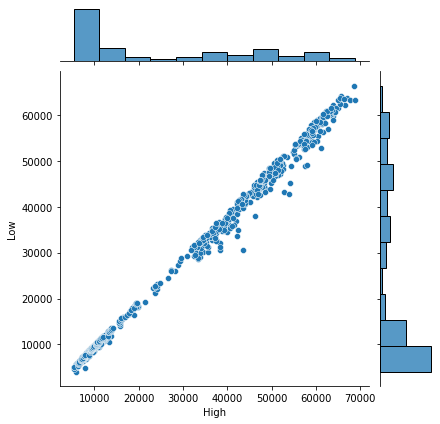

In [10]:
sns.jointplot(x='High', y='Low',data=data )

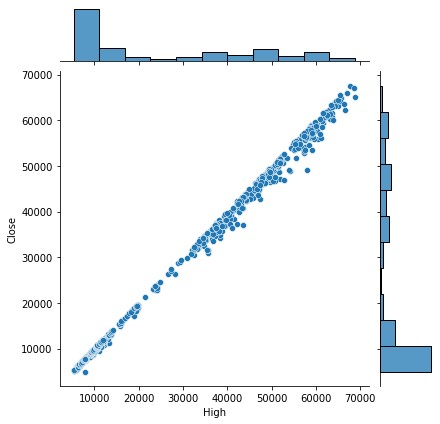

In [11]:
sns.jointplot(x='High', y='Close',data=data )

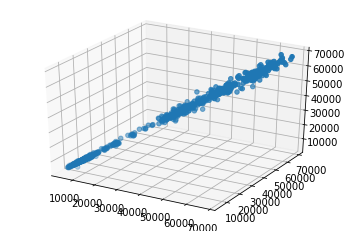

In [12]:
x = data['Open']
y= data['High']
z = data['Close']
fig, ax = plt.subplots(subplot_kw={'projection':'3d'}) 
ax.scatter(x,y,z) 
plt.show()

In [13]:
data.iloc[:,1:] = data.iloc[:,1:].apply(lambda x: (x-x.mean())/ x.std(), axis=0) # we normalise the entire data set which is basically the organization of data to appear similar across all fields.
data

,Date,Open,High,Low,Close
1691,2019-05-05,-0.985408,-0.992890,-0.985256,-0.989260
1692,2019-05-06,-0.987465,-0.994462,-0.988189,-0.991817
1693,2019-05-07,-0.989873,-0.985040,-0.983456,-0.987494
1694,2019-05-08,-0.984446,-0.984949,-0.980578,-0.979499
1695,2019-05-09,-0.977507,-0.975128,-0.970453,-0.969459
...,...,...,...,...,...
2686,2022-01-24,0.604945,0.605068,0.497644,0.623761
2687,2022-01-25,0.624746,0.615091,0.637718,0.639425
2688,2022-01-26,0.640194,0.685332,0.669856,0.634099
2689,2022-01-27,0.634519,0.600022,0.629614,0.649055


In [14]:
from sklearn import linear_model # this module is used to implement simple linear and multiple linear regression, in this case multiple linear

In [15]:
z=data[['Open','Low','Close']] #this is our independant data
y=data['High'] #this is the data we are trying to predict 
from sklearn.model_selection import train_test_split 

In [16]:
SEED=20 #this is used to divide our data into training data which we use to train the model with and test data which we used to test our model
z_train,z_test,y_train,y_test = train_test_split(z,y,test_size=0.2,random_state=SEED)

In [17]:
mod=linear_model.LinearRegression() # here, we are trying to find a line which passes through the middle of the dataset
mod.fit(z_train,y_train)

LinearRegression()

In [18]:
print(mod.intercept_,mod.coef_) #this finds the y intercept of the linear regression line and the different coefficients of the three different features

0.0004582078320175126 [ 0.65184481 -0.31560236  0.66400765]


In [19]:
y_pred=mod.predict(z_test) #we are assigning the values of predicted data to the variable y_predict

In [20]:
results= pd.DataFrame({'ACTUAL VALUE': y_test, 'PREDICTED VALUE':y_pred}) #comparing the values of the actual value and the predicted value
print(results)

      ACTUAL VALUE  PREDICTED VALUE
2581      1.650182         1.640012
2385      1.678112         1.680001
2489      0.469615         0.471143
1838     -0.869390        -0.864325
2549      1.114484         1.100649
...            ...              ...
1841     -0.862709        -0.854996
1970     -0.787236        -0.779287
2235     -0.595220        -0.586291
2259     -0.337831        -0.333996
2602      1.885497         1.898288

[200 rows x 2 columns]


In [21]:
from sklearn.metrics import mean_squared_error as msqe # this module helps us find the mean squared error of the model
mse=msqe(y_test,y_pred)
print('The mean squared error value is',mse)

The mean squared error value is 0.0004944418597000172


In [22]:
amp=sum((y_test-y_pred)**2)# this formula helps us find the R^2 value of the model
ama=sum((y_test-y_test.mean())**2)
r2_value= 1 - amp/ama
print('the R^2 value of the model is ',r2_value)

the R^2 value of the model is  0.9994483745982616
